<a href="https://colab.research.google.com/github/helen030/portfolio/blob/main/Objective_1_Cost_effectiveness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total cases observed: 105708


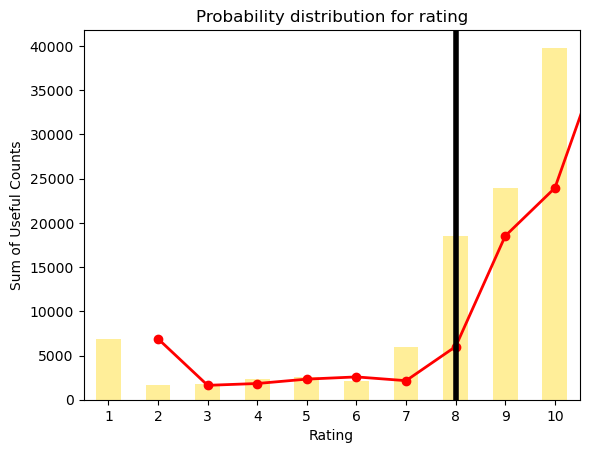

Poon's rating is 8, based on the basic reviews observed in Hk market.
Due to the great level of similarity between products in this market, it is evident that Poon's has to improve their product in a certain way, be it ingredients, or concentration of ingredients which can enable it's rating to improve to a 9-10 range, where we see a great number of products lie


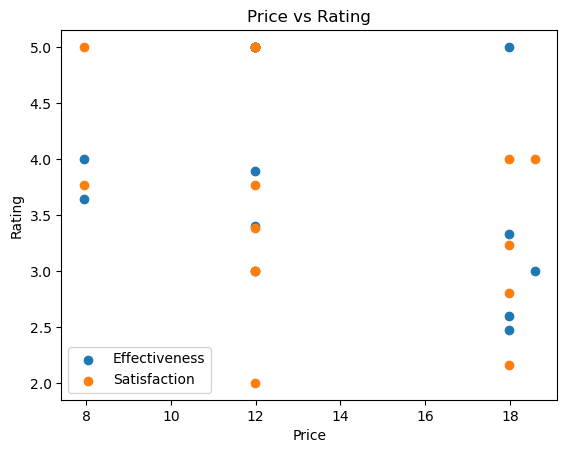

Coorelation between price and effectiveness is -0.3971024888843745
Coorelation between price and satisfaction is -0.3603214221146191
Coorelation between satisfaction and effectiveness is 0.45603211377809927 

╒════╤══════════════╤═══════════════╤═══════════════╕
│    │  Variable 1  │  Variable 2   │   Correlation │
╞════╪══════════════╪═══════════════╪═══════════════╡
│  0 │    Price     │ Effectiveness │     -0.397102 │
├────┼──────────────┼───────────────┼───────────────┤
│  1 │    Price     │ Satisfaction  │     -0.360321 │
├────┼──────────────┼───────────────┼───────────────┤
│  2 │ Satisfaction │ Effectiveness │      0.456032 │
╘════╧══════════════╧═══════════════╧═══════════════╛


In [ ]:
#Objective 1

#Probabaility distribution for ratings

#Import necessary libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

#Obtain the file directory
path = r"C:\Users\ayush\OneDrive\Documents\STAT2604\Project stuff\Databases to use\drugsComTest_raw Rating, dosage.csv"

df = pd.read_csv(path)

#Carry out data-cleaning by filtering out medication relevant to the project, and grouping accordingly
filtered_df = df[df['condition'].str.contains('pain' or 'joint' or 'muscle', case=False, na = False)]

#Further modify the filtered database by making it easier to use for the objective
new_df = filtered_df[['rating','usefulCount']]
grouped_df = new_df.groupby('rating')['usefulCount'].sum()

#Calculate the number of observed cases to show how reliable findings are
s = 0
for name,count in grouped_df.items():
    s += count
print(f"Total cases observed: {s}")

#Plot the distribution and show Poon's medicine's rating
grouped_df.plot(kind='bar', x='rating', y='usefulCount', color = '#FFEE99')
grouped_df.plot(kind='line', x='rating', y='usefulCount', color='red', linewidth=2, marker='o')
plt.axvline(x=7, color='black', linestyle='-', linewidth=4)
plt.xlabel('Rating')
plt.ylabel('Sum of Useful Counts')
plt.title('Probability distribution for rating')
plt.show()

print("Poon's rating is 8, based on the basic reviews observed in Hk market.\nDue to the great level of similarity between products in this market, it is evident that Poon's has to improve their product in a certain way, be it ingredients, or concentration of ingredients which can enable it's rating to improve to a 9-10 range, where we see a great number of products lie")

#####################################################
# Check how price affects satisfaction and effectiveness

#Obtain the file directory
path = r"C:\Users\ayush\OneDrive\Documents\STAT2604\Project stuff\Databases to use\Drug_ratings_performance.csv"
df = pd.read_csv(path)

#Carry out data-cleaning by filtering out medication relevant to the project, and grouping accordingly
filtered_df = df[df['Condition'].str.contains('pain' or 'joint' or'muscle', case = False, na = False)]

#Further modify the filtered database by making it easier to use for the objective
new_df = filtered_df[['Price','Effective','Satisfaction']]
new_df = new_df[new_df['Price'] <= 25]

#Plot the scatterplot for visualisation
plt.scatter(new_df['Price'], new_df['Effective'], label='Effectiveness')
plt.scatter(new_df['Price'], new_df['Satisfaction'], label='Satisfaction')

plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Price vs Rating')
plt.legend()
plt.show()

#Carry out some correlation analysis between the parameters
correlation1 = new_df['Price'].corr(new_df['Effective'])
print(f"Coorelation between price and effectiveness is {correlation1}")
correlation2 = new_df['Price'].corr(new_df['Satisfaction'])
print(f"Coorelation between price and satisfaction is {correlation2}")
correlation3 = new_df['Satisfaction'].corr(new_df['Effective'])
print(f"Coorelation between satisfaction and effectiveness is {correlation3} \n")

#Tabulate the results
data = {'Variable 1': ['Price','Price','Satisfaction'],
        'Variable 2': ['Effectiveness', 'Satisfaction', 'Effectiveness'],
        'Correlation': [correlation1, correlation2, correlation3]}

cf = pd.DataFrame(data)

table = tabulate(cf, headers='keys', tablefmt='fancy_grid', stralign = 'center')

print(table)


#Objective5 male female
#import pandas as pd
#import matplotlib.pyplot as plt
#path = r"C:\Users\ayush\OneDrive\Documents\STAT2604\Databases\webmd.csv"
#df = pd.read_csv(path)
#new_df = df[df['Condition'].str.contains('joint' or 'muscle' or 'Joint' or 'Muscle', case=False, na = False)]
#filtered_df = new_df.dropna()
#gender_counts = filtered_df['Sex'].value_counts()
#plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
#plt.title('Proportion of Males and Females')
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
#plt.show()